In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Подключаем возможность рисовать графики
import matplotlib.colors as mcolors # Подключаем стандартную палитру, чтобы раскрасить графики
from itertools import combinations

In [ ]:
class LinearForm2D:

  def __init__(self, a, b, c = None, sign = None):
    self._a = a
    self._b = b
    self._c = c
    self._sign = sign
    self._label = ((str(self._a) if self._a != 1 else '') + " x_1 " if self._a != 0 else '') + \
                    (" + " + (str(self._b) if self._b != 1 else '') + " x_2 " if self._b != 0 else '') + \
                      (self._sign + str(self._c) if self._c else '')

  def __repr__(self):
    return self._label

  # Вычислить значение линейной формы (например, целевой функции)
  # для данных значений x1 и x2
  def f_value(self, x1, x2):
    return self._a * x1 + self._b * x2

  def x1_func(self, x2):
    return (self._c - self._b * x2) / self._a if (self._a and self._a != 0.0) else None

  def x2_func(self, x1):
    return (self._c - self._a * x1) / self._b if (self._b and self._b != 0.0) else None

  def prepare_plot(self,
                   start = 0, finish = 10, num_of_points = 100,
                   x1_lim_start = 0, x1_lim_finish = 10,
                   x2_lim_start = 0, x2_lim_finish = 10,
                   color='black'):
    # Определяем разбиение оси абсцисс или оси ординат нашего графика:
    points = np.linspace(start, finish, num_of_points)
    x1s = self.x1_func(points)
    if (x1s is not None):
      plt.plot(x1s, points, label=self._label, color=color)
    else:
      x2s = self.x2_func(points)
      if (x2s is not None):
        plt.plot(points, x2s, label=self._label, color=color)
    # Настройка диапазона отображения на графике:
    plt.xlim(x1_lim_start, x1_lim_finish)
    plt.ylim(x2_lim_start, x2_lim_finish)
    plt.legend()

In [ ]:
b1 = LinearForm2D(a=2, b=4, c=10, sign='<=')
b2 = LinearForm2D(1, 0, 4, '<=')
b3 = LinearForm2D(0, 1, 2, '<=')
b4 = LinearForm2D(1, 0, 0, '>=')
b5 = LinearForm2D(0, 1, 0, '>=')

b_list = [b1, b2, b3, b4, b5]

In [ ]:
print(list(mcolors.BASE_COLORS.keys()))

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


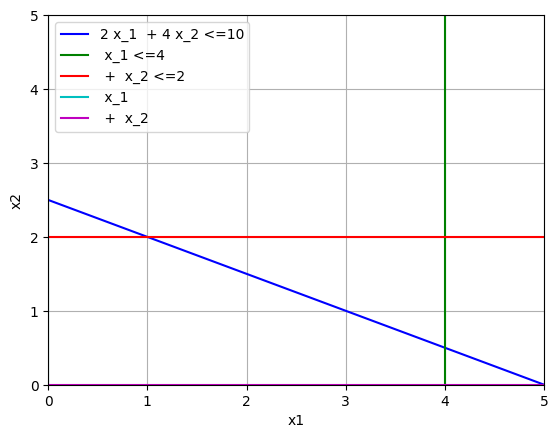

In [ ]:
clrs = list(mcolors.BASE_COLORS.keys())

for b in b_list:
  b.prepare_plot(x1_lim_finish=5, x2_lim_finish=5, color=clrs[b_list.index(b)])

plt.xlabel('x1')
plt.ylabel('x2')

plt.grid()

plt.show()

In [ ]:
def ineq(f, x1, x2):
  if f._sign == '<=':
    return f.f_value(x1, x2) <= f._c
  elif f._sign == '>=':
    return f.f_value(x1, x2) >= f._c
  elif f._sign in {'==', '='}:
    return f.f_value(x1, x2) == f._c
  else:
    return None

print(int(ineq(b1, 0, 0)))
print(int(ineq(b1, 1000, 0)))

1
0


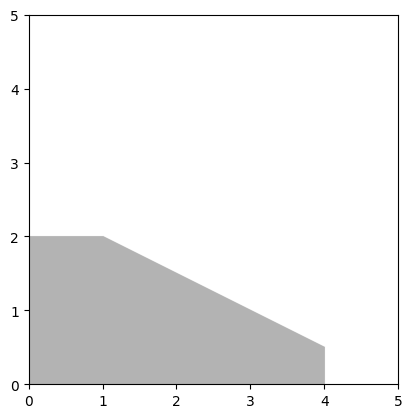

In [ ]:
d = np.linspace(0, 5, 1000)
x1, x2 = np.meshgrid(d, d)

plt.imshow(
    (ineq(b1, x1, x2) & ineq(b2, x1, x2) & ineq(b3, x1, x2) & ineq(b4, x1, x2) & ineq(b5, x1, x2)).astype(int),
    extent=(x1.min(), x1.max(), x2.min(), x2.max()),
    origin='lower',
    cmap='Greys',
    alpha=0.3
)

In [ ]:
def intersection_point(f1, f2):
  det = f1._a * f2._b - f1._b * f2._a
  if det == 0:
    print('No solution found')
    return None
  else:
    return (
        (f1._c * f2._b - f1._b * f2._c) / det,
        (f1._a * f2._c - f1._c * f2._a) / det
    )

In [ ]:
pt_is_feasible = lambda x1, x2: ineq(b1, x1, x2) & ineq(b2, x1, x2) & ineq(b3, x1, x2) & ineq(b4, x1, x2) & ineq(b5, x1, x2)

Z = LinearForm2D(3, 2)
Z_list = []
pt_list = []

for bs in list(combinations(b_list, r=2)):
  pt = intersection_point(bs[0], bs[1])
  if pt is not None and pt_is_feasible(pt[0], pt[1]):
    pt_list.append(pt)
    Z_list.append(Z.f_value(pt[0], pt[1]))

Z_max = max(Z_list)
print(Z_max, pt_list[Z_list.index(Z_max)])
print(Z_list)

No solution found
No solution found
13.0 (4.0, 0.5)
[13.0, 7.0, 12.0, 4.0, 0.0]
